Libraries imported successfully!

Loading MNIST dataset... (This may take a moment)
Dataset loaded in 26.88 seconds.
Shape of feature data (X): (70000, 784)
Shape of target labels (y): (70000,)

--- Starting Exploratory Data Analysis (EDA) ---
Displaying sample digits from the dataset...


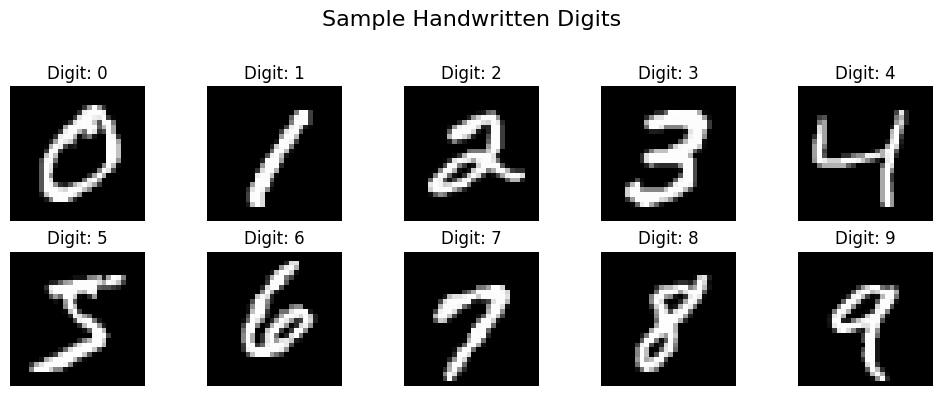


Analyzing the distribution of digit labels...


/tmp/ipython-input-707039489.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


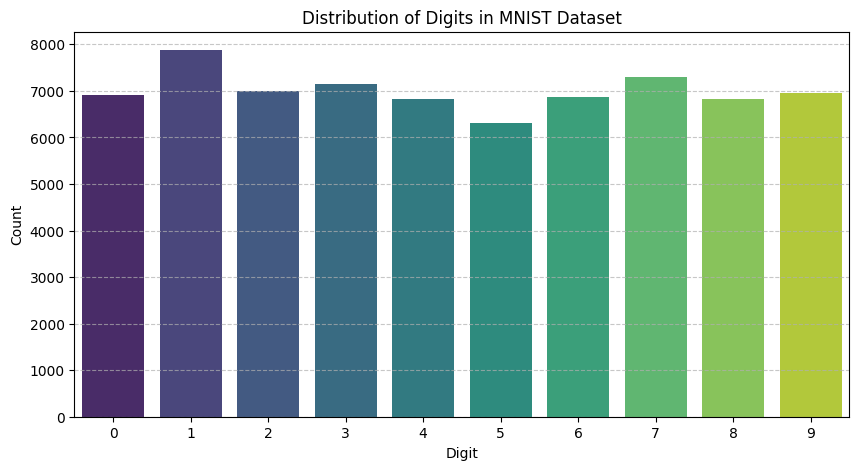

The distribution is fairly balanced across all 10 digits.

Analyzing pixel intensity distribution for a sample image...


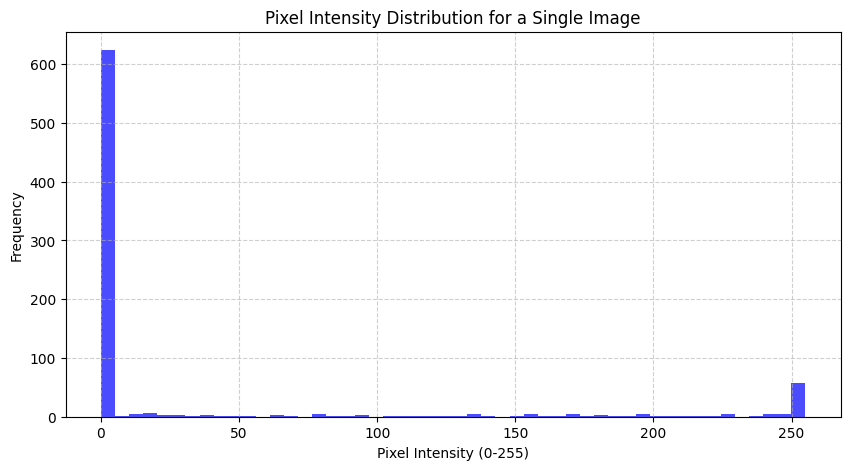

Most pixels are black (intensity 0), as expected for a digit on a dark background.

--- Starting Data Preprocessing ---
Taking a random sample of 15000 images for efficiency...
Sampled data shape (X_sample): (15000, 784)
Scaling pixel values using StandardScaler...

--- Applying PCA ---
First, determining how many components are needed to explain the variance...


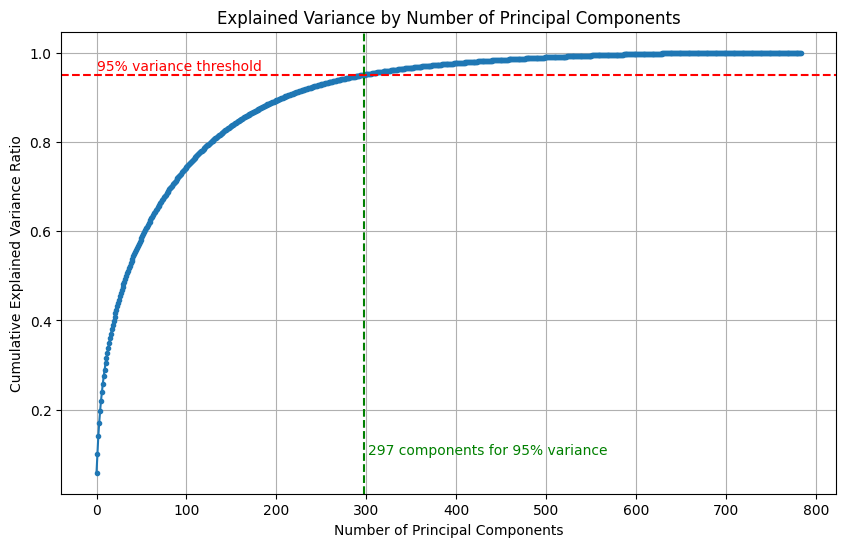

To retain 95% of the total variance, we need 297 principal components.

Now, applying PCA to reduce dimensions to 2 for visualization...
PCA transformation to 2 components complete!
Explained variance by the first 2 principal components: 10.14%
This means we lose a lot of information, but it's useful for visualization.

--- Visualizing PCA Results ---


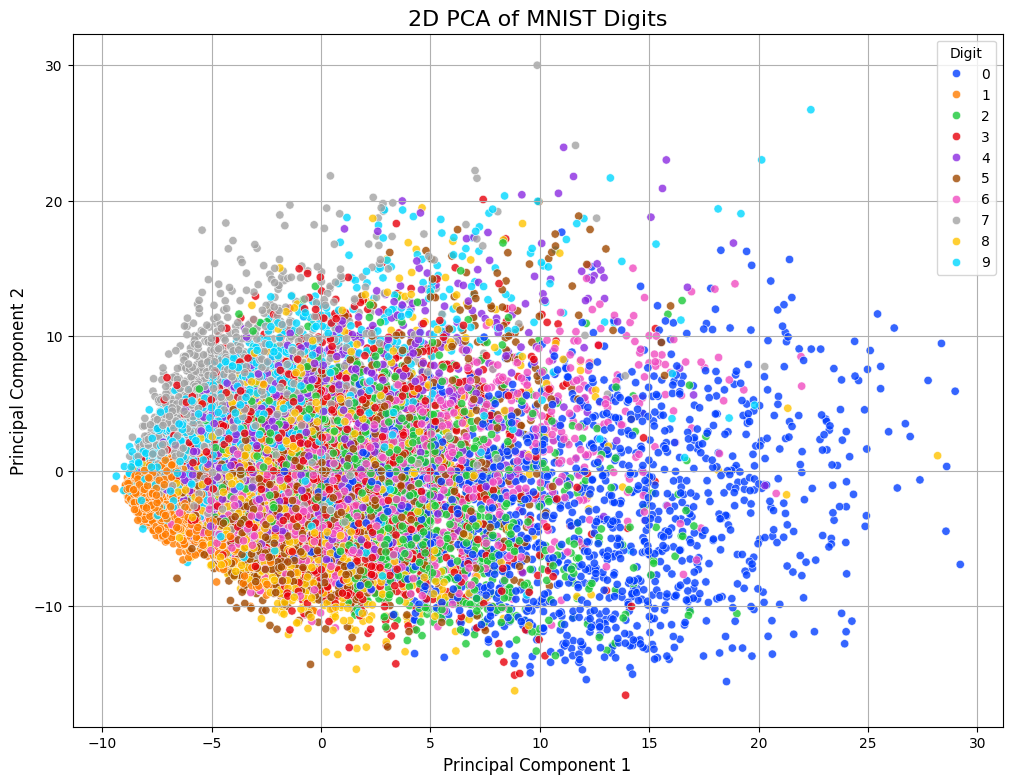

The plot shows distinct clusters for different digits, even after reducing from 784 to 2 dimensions!

--- Analyzing the Principal Components Themselves ---
Visualizing the first 10 principal components as images...


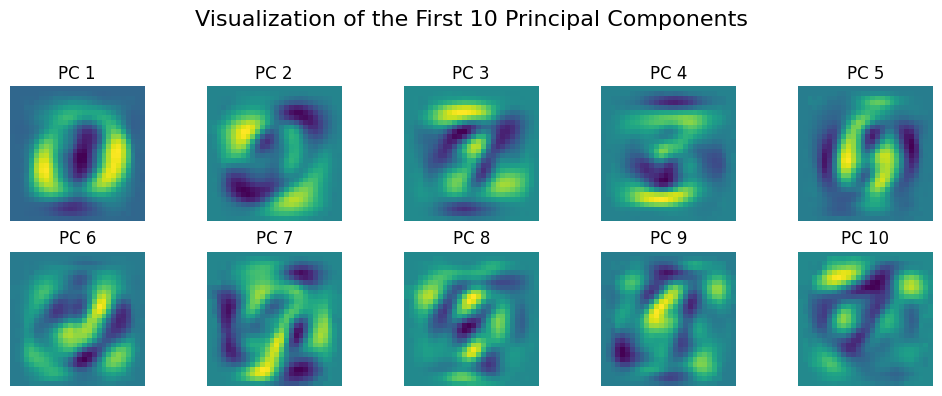


These images look like 'ghostly' or 'archetypal' digits. They represent the fundamental patterns and strokes that PCA uses to differentiate the images.

--- Analysis Complete ---


In [1]:
# ==============================================================================
#                      PCA on MNIST: From EDA to Visualization
# ==============================================================================
# This script provides a complete workflow for applying Principal Component Analysis
# (PCA) to the MNIST dataset of handwritten digits. We will perform:
# 1.  Exploratory Data Analysis (EDA) to understand the data.
# 2.  Data Preprocessing to prepare the data for PCA.
# 3.  PCA to reduce the dimensionality of the data.
# 4.  Visualization of the results to see how digits are clustered.
# 5.  Analysis of the principal components themselves.
# ==============================================================================

# ==============================================================================
# Step 1: Import Necessary Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

print("Libraries imported successfully!")


# ==============================================================================
# Step 2: Load and Inspect the MNIST Dataset
# ==============================================================================
print("\nLoading MNIST dataset... (This may take a moment)")
start_time = time.time()

# Fetch the dataset from openml
# 'parser='liac-arff'' is used for compatibility with the new fetch_openml API
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')

# Extract features (pixel values) and target (digit labels)
X = mnist['data']
y = mnist['target'].astype(int) # Labels are strings by default, convert to int

end_time = time.time()
print(f"Dataset loaded in {end_time - start_time:.2f} seconds.")
print(f"Shape of feature data (X): {X.shape}")
print(f"Shape of target labels (y): {y.shape}")


# ==============================================================================
# Step 3: Exploratory Data Analysis (EDA)
# ==============================================================================
print("\n--- Starting Exploratory Data Analysis (EDA) ---")

# --- 3.1: Visualize Sample Digits ---
print("Displaying sample digits from the dataset...")

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()
for i in range(10):
    # Find the first image of digit 'i'
    idx = np.where(y == i)[0][0]
    img = X[idx].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Digit: {i}")
    axes[i].axis('off')
plt.suptitle('Sample Handwritten Digits', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 3.2: Analyze Label Distribution ---
print("\nAnalyzing the distribution of digit labels...")
plt.figure(figsize=(10, 5))
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Digits in MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("The distribution is fairly balanced across all 10 digits.")

# --- 3.3: Pixel Intensity Analysis ---
print("\nAnalyzing pixel intensity distribution for a sample image...")
sample_image = X[0] # Take the first image
plt.figure(figsize=(10, 5))
plt.hist(sample_image, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution for a Single Image')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("Most pixels are black (intensity 0), as expected for a digit on a dark background.")


# ==============================================================================
# Step 4: Data Preprocessing
# ==============================================================================
print("\n--- Starting Data Preprocessing ---")

# --- 4.1: Subsampling the data ---
# The full dataset (70,000 images) is large. We'll use a smaller random sample
# for faster computation in this demonstration.
SAMPLE_SIZE = 15000
print(f"Taking a random sample of {SAMPLE_SIZE} images for efficiency...")
np.random.seed(42) # for reproducibility
sample_indices = np.random.choice(X.shape[0], SAMPLE_SIZE, replace=False)
X_sample = X[sample_indices]
y_sample = y[sample_indices]
print(f"Sampled data shape (X_sample): {X_sample.shape}")

# --- 4.2: Scaling the data ---
# PCA is sensitive to the scale of features. Since pixel values range from 0 to 255,
# we scale them to have a mean of 0 and a standard deviation of 1.
print("Scaling pixel values using StandardScaler...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample.astype(np.float64))


# ==============================================================================
# Step 5: Applying Principal Component Analysis (PCA)
# ==============================================================================
print("\n--- Applying PCA ---")

# --- 5.1: Determine the optimal number of components ---
print("First, determining how many components are needed to explain the variance...")
# Run PCA to capture all components
pca_full = PCA().fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='.', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
# Add a line for 95% variance
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0, 0.96, '95% variance threshold', color = 'red')
# Find how many components are needed for 95% variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
plt.axvline(x=n_components_95, color='g', linestyle='--')
plt.text(n_components_95 + 5, 0.1, f'{n_components_95} components for 95% variance', color='green')
plt.show()

print(f"To retain 95% of the total variance, we need {n_components_95} principal components.")

# --- 5.2: Apply PCA for 2D Visualization ---
print("\nNow, applying PCA to reduce dimensions to 2 for visualization...")
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
explained_variance_2d = np.sum(pca_2d.explained_variance_ratio_)
print(f"PCA transformation to 2 components complete!")
print(f"Explained variance by the first 2 principal components: {explained_variance_2d:.2%}")
print("This means we lose a lot of information, but it's useful for visualization.")


# ==============================================================================
# Step 6: Visualize the 2D PCA Results
# ==============================================================================
print("\n--- Visualizing PCA Results ---")

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data={
    'PC1': X_pca_2d[:, 0],
    'PC2': X_pca_2d[:, 1],
    'label': y_sample
})

plt.figure(figsize=(12, 9))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='label',
    palette=sns.color_palette("bright", 10),
    data=pca_df,
    legend="full",
    alpha=0.8
)
plt.title('2D PCA of MNIST Digits', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Digit')
plt.show()

print("The plot shows distinct clusters for different digits, even after reducing from 784 to 2 dimensions!")


# ==============================================================================
# Step 7: Analyze the Principal Components
# ==============================================================================
print("\n--- Analyzing the Principal Components Themselves ---")
print("Visualizing the first 10 principal components as images...")
# The components are the "directions" of maximum variance. Visualizing them shows
# what patterns PCA considers most important.

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # Reshape the component vector back into a 28x28 image
    component_image = pca_full.components_[i].reshape(28, 28)
    ax.imshow(component_image, cmap='viridis')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')
plt.suptitle('Visualization of the First 10 Principal Components', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\nThese images look like 'ghostly' or 'archetypal' digits. They represent the fundamental patterns and strokes that PCA uses to differentiate the images.")
print("\n--- Analysis Complete ---")